Create two random data sets with two features and two classes

Dependencies

In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Consider that you are given a car height and you have the class label as 1 if cost of car is greater than 550 and 0 if it is less than or equal to 550.

In [344]:
file_path = 'Data.csv'
df = pd.read_csv(file_path)
df.head()

,Height,Price
0,1.0,550
1,3.0,566
2,4.0,558
3,3.0,784
4,5.0,333


In [345]:
df.iloc[0, 0] 

1.0

# Create the labels from the data

In [346]:
labels = []
c1 = []
c2 = []
c1_count = 0
c2_count = 0
for i in range(df.shape[0]):
  if(df.iloc[i, 1] > 550):
    labels.append(1)
    c1.append(df.iloc[i, 0])
    c1_count += 1
  else:
    labels.append(0)
    c2.append(df.iloc[i, 0])
    c2_count += 1

In [347]:
labels

[0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1]

In [348]:
df['Label'] = labels
df.head()

,Height,Price,Label
0,1.0,550,0
1,3.0,566,1
2,4.0,558,1
3,3.0,784,1
4,5.0,333,0


# Plotting the distribution of samples.

In [349]:
df.iloc[:,0]

0     1.0
1     3.0
2     4.0
3     3.0
4     5.0
5     2.0
6     3.0
7     3.0
8     2.0
9     1.0
10    3.0
11    2.0
12    2.0
13    1.0
14    1.5
15    3.0
16    2.5
17    1.5
18    1.5
19    3.0
20    1.5
21    1.0
22    2.5
23    2.5
24    1.0
25    1.5
26    1.0
Name: Height, dtype: float64

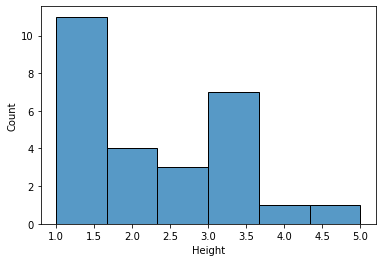

In [350]:
import seaborn as sns
x = df.iloc[:,0]
sns.histplot(x)

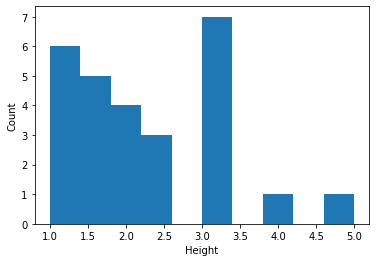

In [351]:
plt.hist(x)
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

# Prior Probabilities for both the classes

In [352]:
len_samples = len(df)
prob_c1 = c1_count/len_samples
prob_c2 = c2_count/len_samples
print("Prior Class 1:",prob_c1)
print("Prior Class 2:",prob_c2)

Prior Class 1: 0.8518518518518519
Prior Class 2: 0.14814814814814814


# Unique Values

In [353]:
from collections import Counter
unique_c1 = Counter(c1).keys() 
count_unique_c1 = list(Counter(c1).values()) 
unique_c2 = Counter(c2).keys() 
count_unique_c2 = list(Counter(c2).values()) 

In [354]:
no_of_samples = len(df)
prob_c1 = c1_count/no_of_samples
prob_c2 = c2_count/no_of_samples
print("Prior Class 1:",prob_c1)
print("Prior Class 2:",prob_c2)

Prior Class 1: 0.8518518518518519
Prior Class 2: 0.14814814814814814


Plot the count of each unique element of the feature

In [355]:
unique_c1

dict_keys([3.0, 4.0, 2.0, 1.0, 1.5, 2.5])

In [356]:
count_unique_c1

[6, 1, 4, 5, 5, 2]

In [357]:
sum(count_unique_c1)

23

In [358]:
unique_c2

dict_keys([1.0, 5.0, 3.0, 2.5])

In [359]:
count_unique_c2

[1, 1, 1, 1]

In [360]:
sum(count_unique_c2)

4

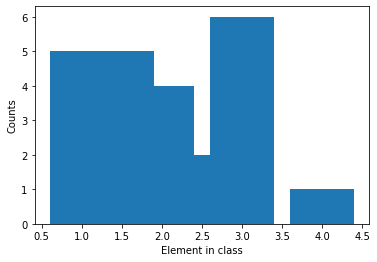

In [361]:
#Not a preferred way to plot distribution
plt.bar(unique_c1,count_unique_c1)
plt.xlabel("Element in class")
plt.ylabel("Counts")
plt.show()

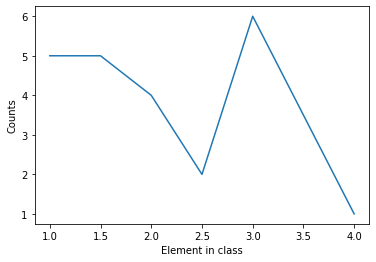

In [362]:
sns.lineplot(list(unique_c1),count_unique_c1)
plt.xlabel("Element in class")
plt.ylabel("Counts")
plt.show()

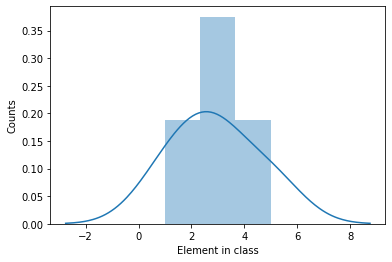

In [363]:
#Probability distribution of x_c2
sns.distplot(c2)
plt.xlabel("Element in class")
plt.ylabel("Counts")
plt.show()

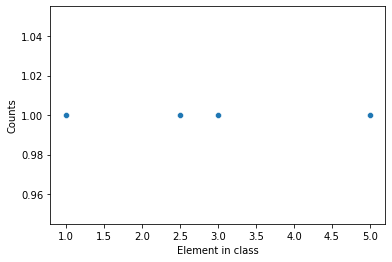

In [364]:
#Plot for the unique values in class c2
sns.scatterplot(list(unique_c2),count_unique_c2)
plt.xlabel("Element in class")
plt.ylabel("Counts")
plt.show()

# Likelihood

Plot P(x|C1) and P(x|C2)

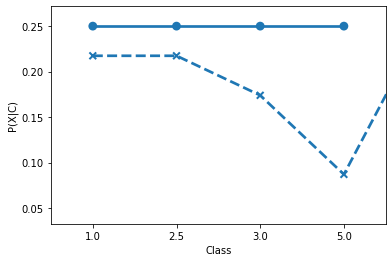

In [365]:
#sns.color_palette("Paired", 9)
y1 = np.array(count_unique_c1)/len(c1)
sns.pointplot(list(unique_c1),y1, linestyles="--",markers =['x'] )
y2 = np.array(count_unique_c2)/len(c2)
sns.pointplot(list(unique_c2),y2,linestyles='-',markers=['o'])
plt.xlabel("Class")
plt.ylabel("P(X|C)")
plt.show()

# Posterior Probability

In [366]:
probability_of_x = {}

for i in range(len(count_unique_c1)):
  if list(unique_c1)[i] in dict(Counter(c2)):
    val = Counter(c1)[list(unique_c1)[i]]*prob_c1/sum(count_unique_c1) + Counter(c2)[list(unique_c1)[i]]*prob_c2/sum(count_unique_c2)
    probability_of_x.__setitem__(list(unique_c1)[i], val)
  else:
    val = Counter(c1)[list(unique_c1)[i]]*prob_c1/sum(count_unique_c1)
    probability_of_x.__setitem__(list(unique_c1)[i], val)

for i in range(len(count_unique_c2)):
  if list(unique_c2)[i] not in dict(Counter(c1)):
     val = Counter(c2)[list(unique_c2)[i]]*prob_c2/sum(count_unique_c2)
     probability_of_x.__setitem__(list(unique_c2)[i], val)

   

probability_of_x

{1.0: 0.22222222222222224,
 1.5: 0.1851851851851852,
 2.0: 0.14814814814814814,
 2.5: 0.1111111111111111,
 3.0: 0.25925925925925924,
 4.0: 0.037037037037037035,
 5.0: 0.037037037037037035}

In [367]:
sum(list(probability_of_x.values()))

1.0

In [368]:
posterior_of_c1 = {}
posterior_of_c2 = {}

for i in range(len(count_unique_c1)):
  val =  (Counter(c1)[list(unique_c1)[i]]/sum(count_unique_c1)) * (prob_c1/prob_x[list(unique_c1)[i]])
  posterior_of_c1.__setitem__(list(unique_c1)[i], val)
  if list(unique_c1)[i] not in dict(Counter(c2)):
     posterior_of_c2.__setitem__(list(unique_c1)[i], 0)

   
for i in range(len(count_unique_c2)):
  val =  (Counter(c2)[list(unique_c2)[i]]/sum(count_unique_c2)) * (prob_c2/prob_x[list(unique_c2)[i]])
  posterior_of_c2.__setitem__(list(unique_c2)[i], val)
  if list(unique_c2)[i] not in dict(Counter(c1)):
     posterior_of_c1.__setitem__(list(unique_c2)[i], 0)
    

In [369]:
posterior_of_c1

{1.0: 0.8333333333333333,
 1.5: 0.9999999999999999,
 2.0: 1.0,
 2.5: 0.6666666666666666,
 3.0: 0.8571428571428572,
 4.0: 1.0,
 5.0: 0}

In [370]:
posterior_of_c2

{1.0: 0.16666666666666666,
 1.5: 0,
 2.0: 0,
 2.5: 0.3333333333333333,
 3.0: 0.14285714285714285,
 4.0: 0,
 5.0: 1.0}

Plot P(C1|x) and P(C2|x)

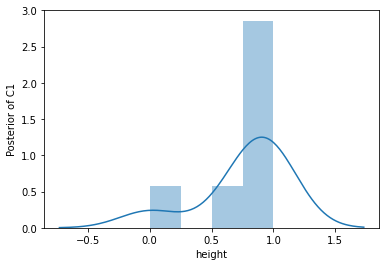

In [371]:
#Probability distribution of posterior c1
sns.distplot(list(posterior_of_c1.values()))
plt.xlabel("height")
plt.ylabel("Posterior of C1")
plt.show()

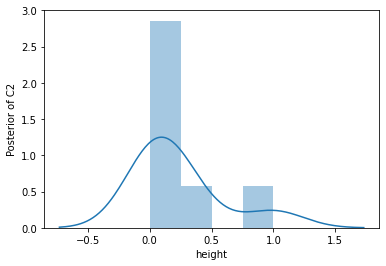

In [372]:
#Probability distribution of posterior c2
sns.distplot(list(posterior_of_c2.values()))
plt.xlabel("height")
plt.ylabel("Posterior of C2")
plt.show()

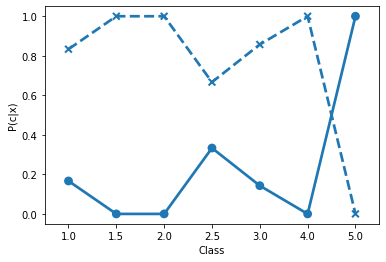

In [373]:
y1 = np.array(list(posterior_of_c1.values()))
sns.pointplot(list(posterior_of_c1.keys()),y1, linestyles="--",markers =['x'] )
y2 =  np.array(list(posterior_of_c2.values()))
sns.pointplot(list(posterior_of_c2.keys()),y2,linestyles='-',markers=['o'])
plt.xlabel("Class")
plt.ylabel("P(c|x)")
plt.show()

# Dataset 2

Read dataset. c1 contains two features of class 1 and c2 contains the two features for class 2. 

In [374]:
df1_train = pd.read_csv('/content/c1')
df2_train = pd.read_csv('/content/c2')
class1_train = pd.read_csv('/content/c1').to_numpy()
class2_train = pd.read_csv('/content/c2').to_numpy()

bins = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
df1_train['x1_binned'] = pd.cut(df1_train['x1'], bins)
df2_train['x1_binned'] = pd.cut(df2_train['x1'], bins)

print(df1_train)
print(df2_train)

           x1        x2 x1_binned
0    0.320478  0.481092    (0, 1]
1    0.050691  0.096400    (0, 1]
2    3.748470  0.403931    (3, 4]
3    2.256374  2.089962    (2, 3]
4    1.421454  1.243629    (1, 2]
..        ...       ...       ...
155  3.834316  2.578794    (3, 4]
156  1.690178  0.213917    (1, 2]
157  0.610302  0.798047    (0, 1]
158  1.645452  0.980061    (1, 2]
159  2.186148  1.655246    (2, 3]

[160 rows x 3 columns]
          x1        x2 x1_binned
0  -0.779019  1.163869   (-1, 0]
1  -1.345146 -2.323707  (-2, -1]
2  -0.528361 -1.594005   (-1, 0]
3  -0.904174 -1.306116   (-1, 0]
4  -1.019487 -1.336907  (-2, -1]
5   0.401736 -0.192814    (0, 1]
6   0.179973 -0.367843    (0, 1]
7  -1.752192  0.234161  (-2, -1]
8  -1.335903 -0.641210  (-2, -1]
9  -1.843742 -1.153515  (-2, -1]
10  0.235126 -0.482024    (0, 1]
11 -0.832935 -1.156170   (-1, 0]
12 -2.403137 -0.810731  (-3, -2]
13 -0.201638  0.147118   (-1, 0]
14 -1.425997 -2.384053  (-2, -1]
15 -1.006180 -0.357675  (-2, -1]
16 -0.0

In [375]:
print(class1_train.shape)
print(class1_train)
print(type(class2_train))
print(class2_train.shape)
print(type(class1_train))
print(class2_train)

(160, 2)
[[ 3.20478053e-01  4.81092097e-01]
 [ 5.06909985e-02  9.63995041e-02]
 [ 3.74846984e+00  4.03931041e-01]
 [ 2.25637447e+00  2.08996208e+00]
 [ 1.42145382e+00  1.24362901e+00]
 [ 4.08062705e-01  9.24810050e-01]
 [ 1.60681941e+00  4.75268430e-01]
 [ 1.57397678e+00  1.60394699e+00]
 [ 1.73121450e+00  2.43452464e+00]
 [ 9.30696141e-01  2.12345759e-01]
 [ 1.43750641e+00 -2.84913595e-01]
 [-4.91480512e-01  2.70506180e-01]
 [ 2.35052206e+00  2.34923853e+00]
 [ 1.06032568e+00  2.25909849e-01]
 [ 2.23321779e+00  1.18800751e+00]
 [-3.36602971e-01  8.26100949e-01]
 [ 1.21051794e+00  3.59324046e-01]
 [ 1.95878231e+00  2.81435856e+00]
 [ 5.35856323e-01 -1.54336636e-01]
 [ 2.89423945e+00  1.71311383e+00]
 [ 1.38569352e+00  1.74692600e+00]
 [ 1.27854113e+00 -3.70841388e-01]
 [-9.07354159e-02  2.42044784e+00]
 [ 9.07143282e-01  5.69730755e-01]
 [ 2.28848082e+00  1.68559588e+00]
 [-1.53479431e-01 -3.95808482e-01]
 [ 2.40208659e+00  4.41623125e-01]
 [ 1.21455553e+00  1.51675544e+00]
 [ 3.150590

In [376]:
data = []
for i in class1_train:
  data.append([i[0],i[1],1])
for i in class2_train:
  data.append([i[0],i[1],2])
df_c1_c2 = pd.DataFrame(data,columns=['x1','x2','class'])
bins = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
df_c1_c2['x1_binned'] = pd.cut(df_c1_c2['x1'], bins)
df_c1_c2.head()

,x1,x2,class,x1_binned
0,0.320478,0.481092,1,"(0, 1]"
1,0.050691,0.096400,1,"(0, 1]"
2,3.748470,0.403931,1,"(3, 4]"
3,2.256374,2.089962,1,"(2, 3]"
4,1.421454,1.243629,1,"(1, 2]"


# Plotting the distribution of samples.

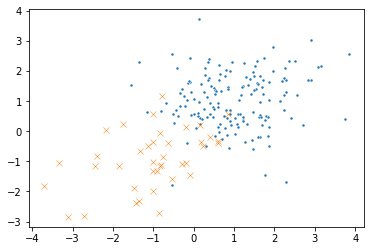

In [377]:
import seaborn as sns
sns.scatterplot(class1_train[:,0],class1_train[:,1],marker='.')
sns.scatterplot(class2_train[:,0],class2_train[:,1],marker='x')
plt.show()

Determine Prior Probabilities

In [378]:
no_of_samples = len(class1_train)+len(class2_train)

In [379]:
prob_c1 = len(class1_train)/no_of_samples
prob_c1

0.8040201005025126

In [380]:
prob_c2 = len(class2_train)/no_of_samples
prob_c2

0.19597989949748743

Plotting the prior

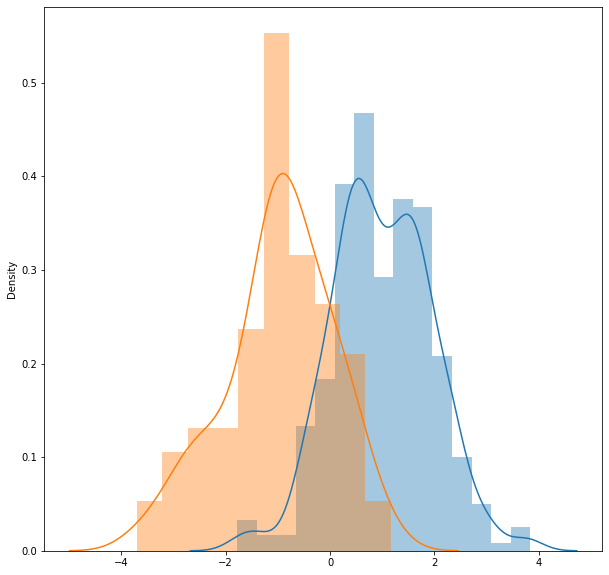

In [381]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
sns.distplot(class1_train,label='C1')
sns.distplot(class2_train)
plt.show()

Plot the data distribution and the histogram of feature 1 and feature 2 in the x axis and the y -axis respectively. The distribution of feature 1 wil be along the top of the x-axis and feature 2 along the right of the y axis.

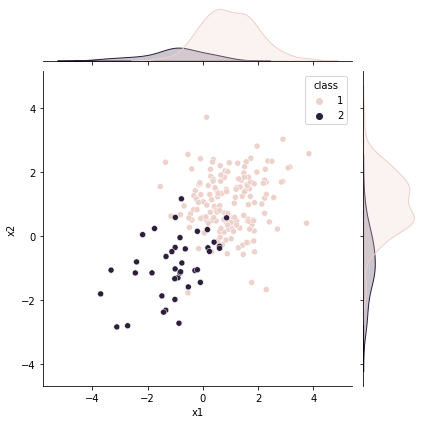

In [382]:
sns.jointplot(data=df_c1_c2, x="x1",color="red", y="x2", hue="class")

In [383]:
from collections import Counter
x = df1_train['x1_binned']
print(x)
unique_c1 = Counter(x).keys() 
count_unique_c1 = list(Counter(x).values()) 
x = df2_train['x1_binned']
unique_c2 = Counter(x).keys() 
count_unique_c2 = list(Counter(x).values()) 

0      (0, 1]
1      (0, 1]
2      (3, 4]
3      (2, 3]
4      (1, 2]
        ...  
155    (3, 4]
156    (1, 2]
157    (0, 1]
158    (1, 2]
159    (2, 3]
Name: x1_binned, Length: 160, dtype: category
Categories (8, interval[int64]): [(-4, -3] < (-3, -2] < (-2, -1] < (-1, 0] < (0, 1] < (1, 2] < (2, 3] <
                                  (3, 4]]


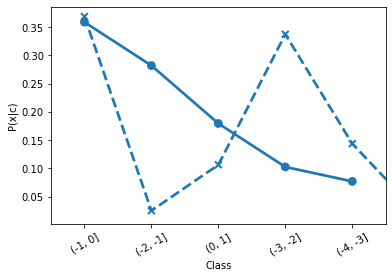

<Figure size 1800x1800 with 0 Axes>

In [384]:
y1 = np.array(count_unique_c1)/len(df1_train)
sns.pointplot(list(unique_c1),y1, linestyles="--",markers =['x'] )
y2 = np.array(count_unique_c2)/len(df2_train)
sns.pointplot(list(unique_c2),y2,linestyles='-',markers=['o'])
plt.xlabel("Class")
plt.ylabel("P(x|c)")
plt.xticks(rotation=30)
plt.figure(figsize=(25,25))
plt.show()

In [385]:
count_x = Counter(df_c1_c2['x1_binned'])
print(count_x)

print(y1,y2)

Post_c1_cnt = np.array(y1)*prob_c1
Post_c2_cnt = np.array(y2)*prob_c2

print(Post_c1_cnt, Post_c2_cnt)

list_unique_c1 = list(unique_c1)
list_unique_c2 = list(unique_c2)


for i in range(0,len(unique_c1)):
  Post_c1_cnt[i] = Post_c1_cnt[i]/(count_x[list_unique_c1[i]]/len(data))
for i in range(0,len(unique_c2)):
  Post_c2_cnt[i] = Post_c2_cnt[i]/(count_x[list_unique_c2[i]]/len(data))
  
print(Post_c1_cnt)
print(Post_c2_cnt)

Counter({Interval(0, 1, closed='right'): 66, Interval(1, 2, closed='right'): 54, Interval(-1, 0, closed='right'): 37, Interval(2, 3, closed='right'): 17, Interval(-2, -1, closed='right'): 14, Interval(3, 4, closed='right'): 4, Interval(-3, -2, closed='right'): 4, Interval(-4, -3, closed='right'): 3})
[0.36875 0.025   0.10625 0.3375  0.14375 0.01875] [0.35897436 0.28205128 0.17948718 0.1025641  0.07692308]
[0.29648241 0.0201005  0.08542714 0.27135678 0.11557789 0.01507538] [0.07035176 0.05527638 0.03517588 0.0201005  0.01507538]
[0.89393939 1.         1.         1.         0.62162162 0.21428571]
[0.37837838 0.78571429 0.10606061 1.         1.        ]


[Text(0, 0.5, 'P(w/x)'), Text(0.5, 0, 'Interval')]

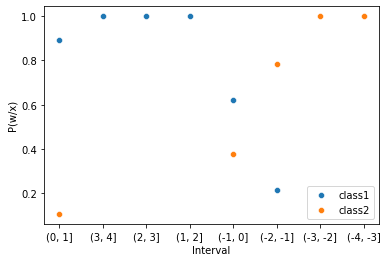

In [386]:
l1 = np.array(list_unique_c1,dtype='S')
l2 = np.array(list_unique_c2,dtype='S')
g1 = sns.scatterplot(x=l1,y=Post_c1_cnt,label='class1')
g1 = sns.scatterplot(x=l2,y=Post_c2_cnt,label='class2')
g1.set(xlabel="Interval",ylabel="P(w/x)")

# Plot the Posterior Probability for each class

# In the report please explain the plots that you are getting clearly explaining the reason .

In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [388]:
iris = pd.read_csv('/content/Iris.csv')
iris.drop(["Id"], axis=1, inplace=True)

bins = [1,2,3,4,5,6,7,8,9,10]
iris['SepalLengthCm_binned'] = pd.cut(iris['SepalLengthCm'], bins)

ord_enc = OrdinalEncoder()
iris["Species"] = ord_enc.fit_transform(iris[["Species"]])
data_iris = iris.to_numpy()
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCm_binned
0,5.1,3.5,1.4,0.2,0.0,"(5, 6]"
1,4.9,3.0,1.4,0.2,0.0,"(4, 5]"
2,4.7,3.2,1.3,0.2,0.0,"(4, 5]"
3,4.6,3.1,1.5,0.2,0.0,"(4, 5]"
4,5.0,3.6,1.4,0.2,0.0,"(4, 5]"


In [389]:
df1_a = []
df2_a = []
df3_a = []

label = []
x_iris_c1 = []
x_iris_c2 = []
x_iris_c3= []
c1_iris_count = 0
c2_iris_count = 0
c3_iris_count = 0
for i in range(data_iris.shape[0]):
  if(data_iris[i][4] == 0.0):
    label.append(0)
    x_iris_c1.append(data_iris[i][0])
    #df1_a.append()
    df1_a.append([data_iris[i][0],data_iris[i][1],data_iris[i][2],data_iris[i][3],data_iris[i][4],data_iris[i][5]])
    c1_iris_count += 1
  if(data_iris[i][4] == 1.0):
    label.append(1)
    x_iris_c2.append(data_iris[i][0])
    df2_a.append([data_iris[i][0],data_iris[i][1],data_iris[i][2],data_iris[i][3],data_iris[i][4],data_iris[i][5]])
    c2_iris_count += 1
  if(data_iris[i][4] == 2.0):
    label.append(2)
    df3_a.append([data_iris[i][0],data_iris[i][1],data_iris[i][2],data_iris[i][3],data_iris[i][4],data_iris[i][5]])
    x_iris_c3.append(data_iris[i][0])
    c3_iris_count += 1

In [390]:
class1_train = pd.DataFrame(df1_a,columns=['SepalLengthCm','SepalWidthCm','SepalWidthCm','PetalWidthCm','Species','SepalLengthCm_binned'])
class2_train = pd.DataFrame(df2_a,columns=['SepalLengthCm','SepalWidthCm','SepalWidthCm','PetalWidthCm','Species','SepalLengthCm_binned'])
class3_train = pd.DataFrame(df3_a,columns=['SepalLengthCm','SepalWidthCm','SepalWidthCm','PetalWidthCm','Species','SepalLengthCm_binned'])

In [391]:
no_of_samples = len(class1_train)+len(class2_train)+len(class3_train)

In [392]:
prob_c1 = len(class1_train)/no_of_samples
prob_c1

0.3333333333333333

In [393]:
prob_c2 = len(class2_train)/no_of_samples
prob_c2

0.3333333333333333

In [394]:
prob_c3 = len(class3_train)/no_of_samples
prob_c3

0.3333333333333333

In [395]:
from collections import Counter
x = class1_train['SepalLengthCm_binned']
print(x)
unique_c1 = Counter(x).keys() 
count_unique_c1 = list(Counter(x).values()) 
x = class2_train['SepalLengthCm_binned']
unique_c2 = Counter(x).keys() 
count_unique_c2 = list(Counter(x).values()) 
x = class3_train['SepalLengthCm_binned']
unique_c3 = Counter(x).keys() 
count_unique_c3 = list(Counter(x).values()) 

0     (5, 6]
1     (4, 5]
2     (4, 5]
3     (4, 5]
4     (4, 5]
5     (5, 6]
6     (4, 5]
7     (4, 5]
8     (4, 5]
9     (4, 5]
10    (5, 6]
11    (4, 5]
12    (4, 5]
13    (4, 5]
14    (5, 6]
15    (5, 6]
16    (5, 6]
17    (5, 6]
18    (5, 6]
19    (5, 6]
20    (5, 6]
21    (5, 6]
22    (4, 5]
23    (5, 6]
24    (4, 5]
25    (4, 5]
26    (4, 5]
27    (5, 6]
28    (5, 6]
29    (4, 5]
30    (4, 5]
31    (5, 6]
32    (5, 6]
33    (5, 6]
34    (4, 5]
35    (4, 5]
36    (5, 6]
37    (4, 5]
38    (4, 5]
39    (5, 6]
40    (4, 5]
41    (4, 5]
42    (4, 5]
43    (4, 5]
44    (5, 6]
45    (4, 5]
46    (5, 6]
47    (4, 5]
48    (5, 6]
49    (4, 5]
Name: SepalLengthCm_binned, dtype: interval


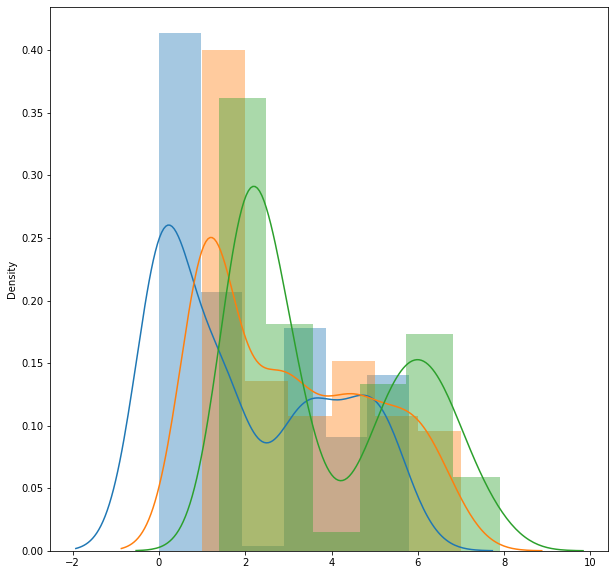

In [396]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
x1 = class1_train
x2 = class2_train
x3 = class3_train
x1.drop(["SepalLengthCm_binned"], axis=1, inplace=True)
x2.drop(["SepalLengthCm_binned"], axis=1, inplace=True)
x3.drop(["SepalLengthCm_binned"], axis=1, inplace=True)
sns.distplot(x1,label='C1')
sns.distplot(x2,label='C2')
sns.distplot(x3,label="C3")
plt.show()

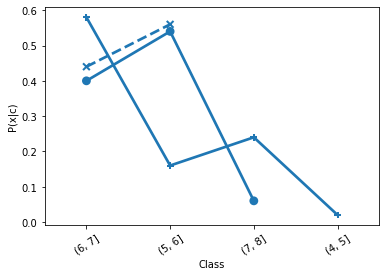

<Figure size 1800x1800 with 0 Axes>

In [397]:
y1 = np.array(count_unique_c1)/len(class1_train)
sns.pointplot(list(unique_c1),y1, linestyles="--",markers =['x'] )
y2 = np.array(count_unique_c2)/len(class2_train)
sns.pointplot(list(unique_c2),y2,linestyles='-',markers=['o'])
y3 = np.array(count_unique_c3)/len(class3_train)
sns.pointplot(list(unique_c3),y3,linestyles='-',markers=['+'])
plt.xlabel("Class")
plt.ylabel("P(x|c)")
plt.xticks(rotation=33)
plt.figure(figsize=(25,25))
plt.show()

In [398]:

count_x = Counter(iris['SepalLengthCm_binned'])
print(count_x)
Post_c1_cnt = np.array(y1)*prob_c1
Post_c2_cnt = np.array(y2)*prob_c2
Post_c3_cnt = np.array(y3)*prob_c3
list_unique_c1 = list(unique_c1)
list_unique_c2 = list(unique_c2)
list_unique_c3 = list(unique_c3)
for i in range(0,len(unique_c1)):
  Post_c1_cnt[i] = Post_c1_cnt[i]/(count_x[list_unique_c1[i]]/len(iris))
for i in range(0,len(unique_c2)):
  Post_c2_cnt[i] = Post_c2_cnt[i]/(count_x[list_unique_c2[i]]/len(iris))
for i in range(0,len(unique_c3)):
  Post_c3_cnt[i] = Post_c3_cnt[i]/(count_x[list_unique_c3[i]]/len(iris))
print(Post_c1_cnt)
print(Post_c2_cnt)

Counter({Interval(5, 6, closed='right'): 57, Interval(6, 7, closed='right'): 49, Interval(4, 5, closed='right'): 32, Interval(7, 8, closed='right'): 12})
[0.38596491 0.875     ]
[0.40816327 0.47368421 0.09375   ]


[Text(0, 0.5, 'P(w/x)'), Text(0.5, 0, 'Interval')]

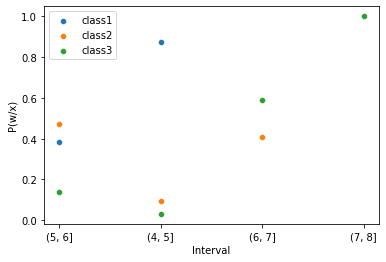

In [400]:
l1 = np.array(list_unique_c1,dtype='S')
l2 = np.array(list_unique_c2,dtype='S')
l3 = np.array(list_unique_c3,dtype='S')
g1 = sns.scatterplot(x=l1,y=Post_c1_cnt,label='class1')
g1 = sns.scatterplot(x=l2,y=Post_c2_cnt,label='class2')
g1 = sns.scatterplot(x=l3,y=Post_c3_cnt,label='class3')
g1.set(xlabel="Interval",ylabel="P(w/x)")